<a href="https://colab.research.google.com/github/surajnihal/wiconsin-breast-cancer/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis

If you want to learn more about the whole process, check out my [blog](https://)

In [ ]:
!pip install ucimlrepo

In [ ]:
# Data Handling and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# UCI ML repo and custom helper function
import ucimlrepo
from ucimlrepo import fetch_ucirepo

# import custom helper module and reload to reflect any changes
import helper
import importlib
importlib.reload(helper)

# Suppress all warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# combining features and targets into a df
df = pd.concat([X,y], axis=1)

In [ ]:
# checking the shape
df.shape

(569, 31)

In [ ]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

## **Data description**

**Target Variable:**
- diagnosis: indicating whether the tumor is malignant (cancerous) or benign
(non-cancerous).Encoded as 'M' for malignant and 'B' for benign.

**Features:**

Mean Features (ending with _mean or 1): These represent the average value of the measurement across the cell nuclei in the image.
- radius_mean: Mean radius of the nucleus.
- texture_mean: Mean texture of the nucleus (variance of gray-scale values).
- perimeter_mean: Mean perimeter of the nucleus.
- area_mean: Mean area of the nucleus.
- smoothness_mean: Mean smoothness of the nucleus (local variation in radius lengths).
- compactness_mean: Mean compactness of the nucleus (perimeter 2 /area−1.0). - A measure of how round/circular the nucleus is.
- concavity_mean: Mean concavity of the nucleus (severity of concave portions of the contour).
- concave points_mean: Mean number of concave portions of the contour.
- symmetry_mean: Mean symmetry of1 the nucleus.
- fractal_dimension_mean: Mean "coastline approximation" - a measure of how irregular the border is.


Standard Error Features (ending with _se or 2): These represent the standard error (an estimate of the variability) of the measurements. They indicate the variation in these features across the cell nuclei.
- radius_se: Standard error of the radius.
- texture_se: Standard error of the texture.
- perimeter_se: Standard error of the perimeter.
- area_se: Standard error of the area.
- smoothness_se: Standard error of the smoothness.
- compactness_se: Standard error of the compactness.
- concavity_se: Standard error of the concavity.
- concave points_se: Standard error of the number of concave points.
- symmetry_se: Standard error of the symmetry.
- fractal_dimension_se: Standard error of the fractal dimension.

Worst Features (ending with _worst or 3): These represent the "worst" or largest (mean of the three largest values) value of the measurement among the cell nuclei in the image.

- radius_worst: "Worst" radius of the nucleus.
- texture_worst: "Worst" texture of the nucleus.
- perimeter_worst: "Worst" perimeter of the nucleus.
- area_worst: "Worst" area of the nucleus.
- smoothness_worst: "Worst" smoothness of the nucleus.
- compactness_worst: "Worst" compactness of the nucleus.
- concavity_worst: "Worst" concavity of the nucleus.
- concave points_worst: "Worst" number of concave points of the nucleus.
- symmetry_worst: "Worst" symmetry of the nucleus.
- fractal_dimension_worst: "Worst" fractal dimension of the nucleus.

In [ ]:
# quick look at the target variable "diagnosis"
df['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

- B(Benign): refers to a condition/tumor/growth that is **not cancerous**. It typically does not invade surrounding tissues or spread to other parts of the body. Benign tumors usually grow slowly, have **well-defined borders**, and are generally not life-threatening. They often do not recur after removal.
- M(Malignant): refers to a condition/tumor/growth that **is cancerous**. Malignant cells grow uncontrollably, invade and destroy nearby tissues, and can metastasize (spread) to other parts of the body through the blood and lymph systems. Malignant tumors often grow rapidly, have **irregular borders**, and can be life-threatening. They have a higher chance of recurring after treatment.

Note: the borders are important because if you look at our feature set, the features are all related to borders (i.e. radius, perimeter etc..) with the help of these border features we are going to predict if cancer is Malignant or Benign

obervations:
- we notice that there are two columns we don't need "id" and "unnamed:32"
- the target variable is imbalanced and datatype should be converted to category

In [ ]:
# changing diagnosis to 1 and 0
df['Diagnosis']=df['Diagnosis'].map({'M':1,'B':0})

# changing datatype of target variabke to cat
df['Diagnosis']=df['Diagnosis'].astype('category')

In [ ]:
# checking that it has taken affects
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

In [ ]:
# checking for mising values
df.isna().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

## Descriptive Analysis

and how the imbalance in data affects the the features

#### target variable

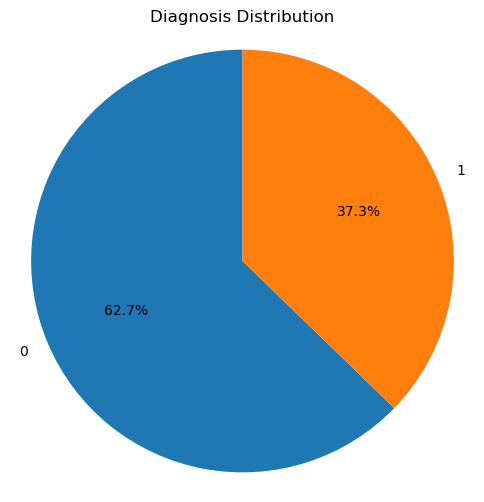

Number of Benign(0): 357
Number of Malignant(1): 212


In [ ]:
# counts
diagnosis_counts = df['Diagnosis'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Diagnosis Distribution')
plt.axis('equal')
plt.show()

counts = df['Diagnosis'].value_counts()
print('Number of Benign(0):', counts.get(0, 0))
print('Number of Malignant(1):', counts.get(1, 0))

## mean features

In [ ]:
importlib.reload(helper)

<module 'helper' from '/Users/surajnihal/Library/CloudStorage/GoogleDrive-surajnihal@gmail.com/Other computers/My MacBook Pro /DePaul/Projects/Healthcare_Substack/helper.py'>

Descriptive Statistics:



,Mean,Std Dev,Min,25th Percentile,Median,75th Percentile,Max
radius1,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture1,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter1,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area1,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
smoothness1,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness1,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity1,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave_points1,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry1,0.18,0.03,0.11,0.16,0.18,0.20,0.30
fractal_dimension1,0.06,0.01,0.05,0.06,0.06,0.07,0.10


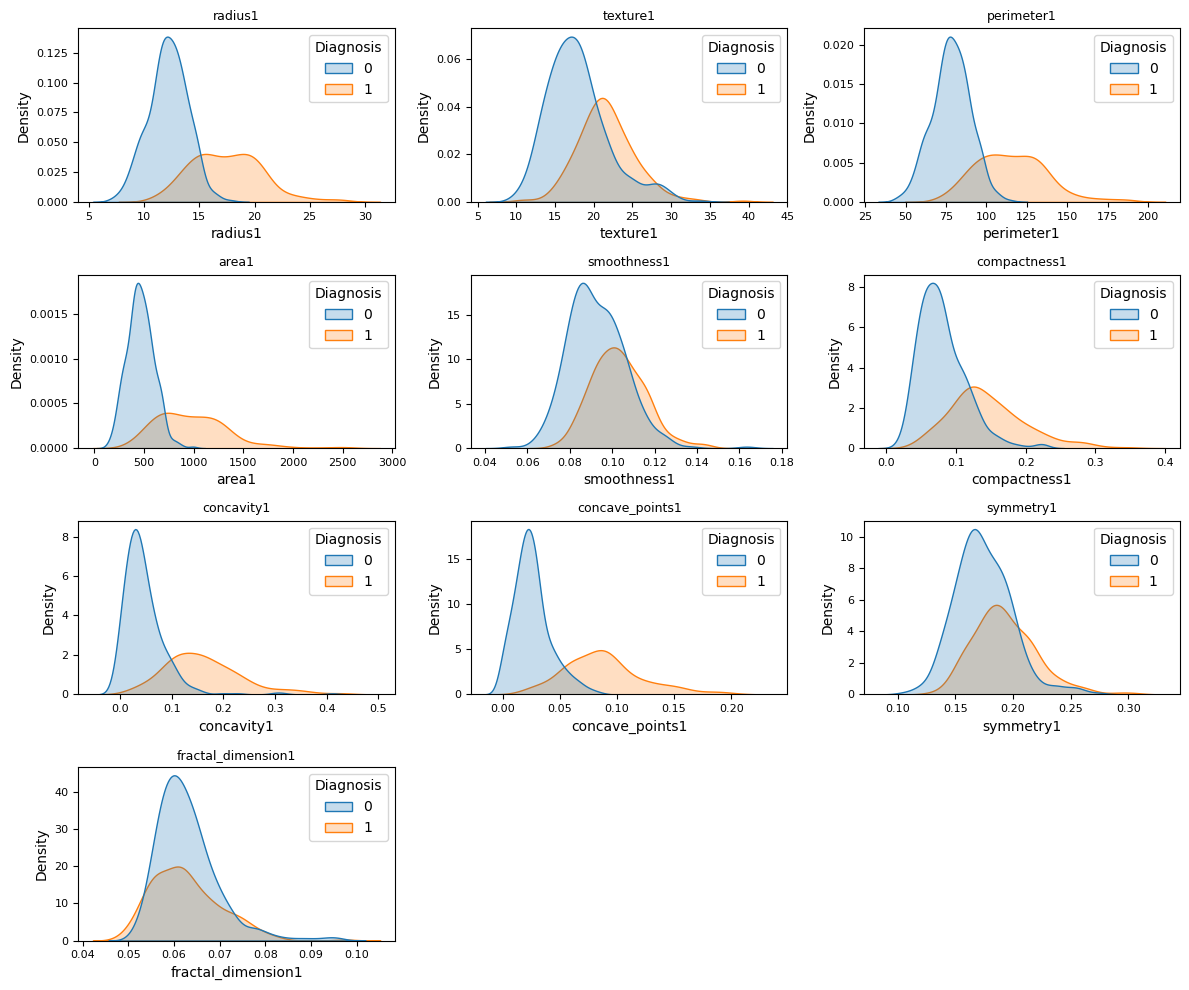

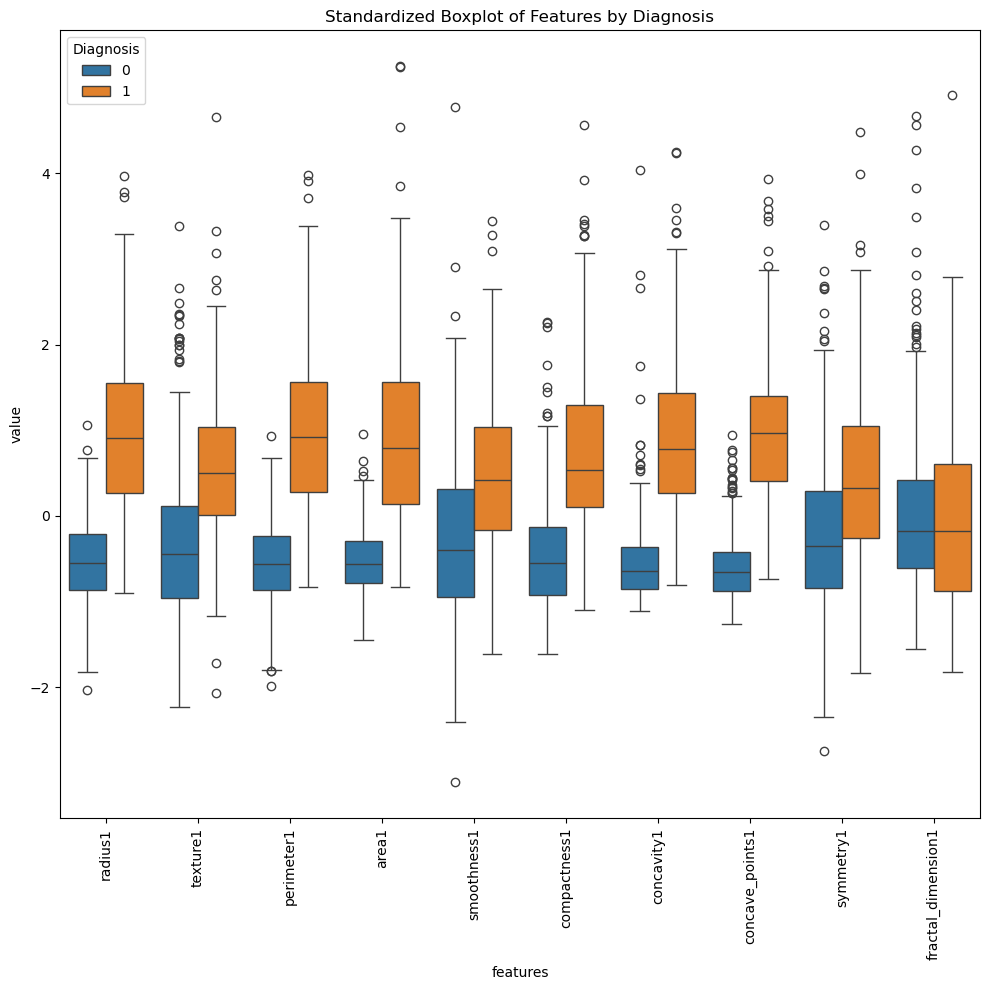

In [ ]:
# lsit with mean features
mean_features = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
                 'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
                 'fractal_dimension1',]

# visualizing target variable
mf_summary = helper.custom_describe(df, mean_features, plot=True)

### standard error features

Descriptive Statistics:



,Mean,Std Dev,Min,25th Percentile,Median,75th Percentile,Max
radius2,0.41,0.28,0.11,0.23,0.32,0.48,2.87
texture2,1.22,0.55,0.36,0.83,1.11,1.47,4.88
perimeter2,2.87,2.02,0.76,1.61,2.29,3.36,21.98
area2,40.34,45.49,6.80,17.85,24.53,45.19,542.20
smoothness2,0.01,0.00,0.00,0.01,0.01,0.01,0.03
compactness2,0.03,0.02,0.00,0.01,0.02,0.03,0.14
concavity2,0.03,0.03,0.00,0.02,0.03,0.04,0.40
concave_points2,0.01,0.01,0.00,0.01,0.01,0.01,0.05
symmetry2,0.02,0.01,0.01,0.02,0.02,0.02,0.08
fractal_dimension2,0.00,0.00,0.00,0.00,0.00,0.00,0.03


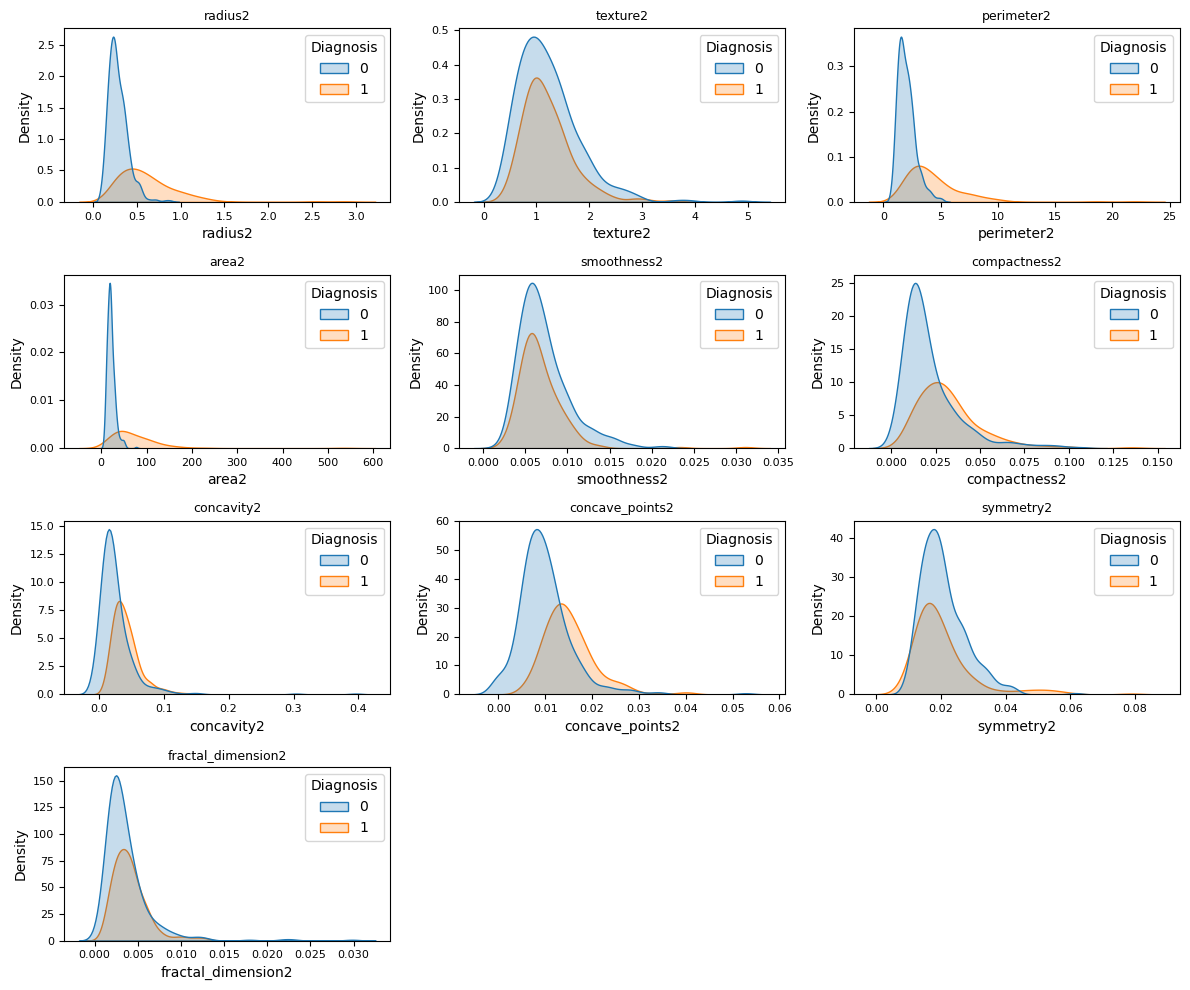

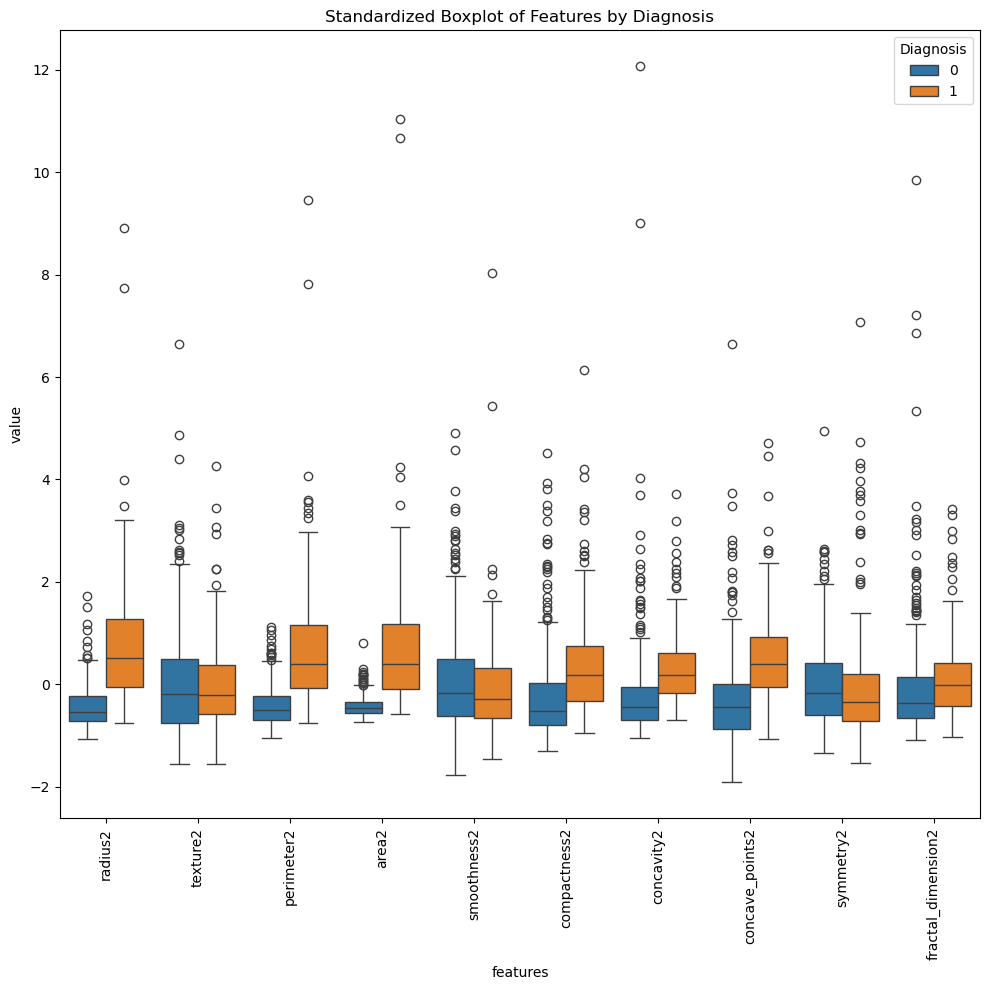

In [ ]:
# list with
standerror_features = ['radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2',
                       'compactness2', 'concavity2', 'concave_points2', 'symmetry2',
                       'fractal_dimension2',]

# visualizing target variable
sf_summary = helper.custom_describe(df, standerror_features, plot=True)

### worst features

Descriptive Statistics:



,Mean,Std Dev,Min,25th Percentile,Median,75th Percentile,Max
radius3,16.27,4.83,7.93,13.01,14.97,18.79,36.04
texture3,25.68,6.15,12.02,21.08,25.41,29.72,49.54
perimeter3,107.26,33.60,50.41,84.11,97.66,125.40,251.20
area3,880.58,569.36,185.20,515.30,686.50,1084.00,4254.00
smoothness3,0.13,0.02,0.07,0.12,0.13,0.15,0.22
compactness3,0.25,0.16,0.03,0.15,0.21,0.34,1.06
concavity3,0.27,0.21,0.00,0.11,0.23,0.38,1.25
concave_points3,0.11,0.07,0.00,0.06,0.10,0.16,0.29
symmetry3,0.29,0.06,0.16,0.25,0.28,0.32,0.66
fractal_dimension3,0.08,0.02,0.06,0.07,0.08,0.09,0.21


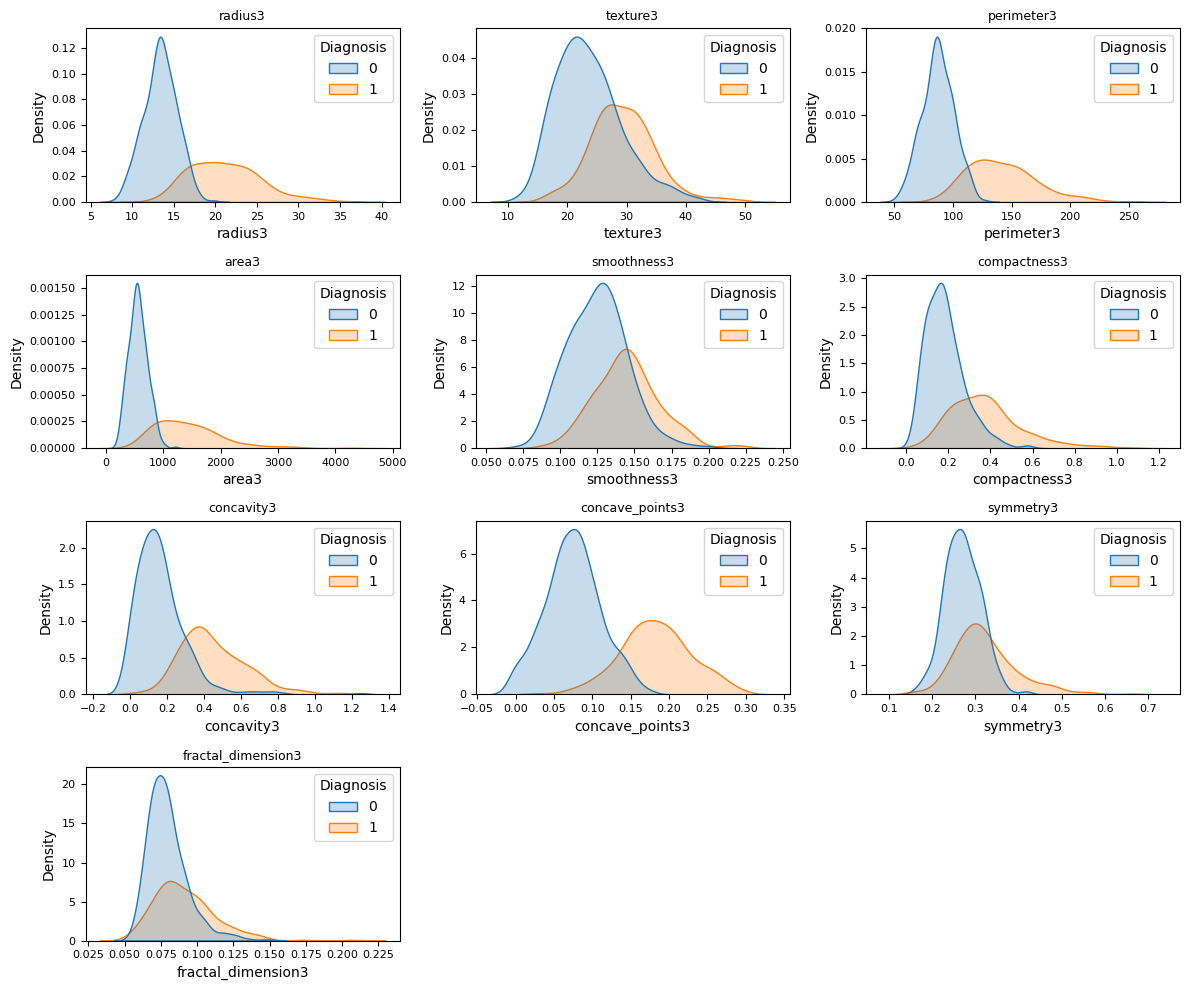

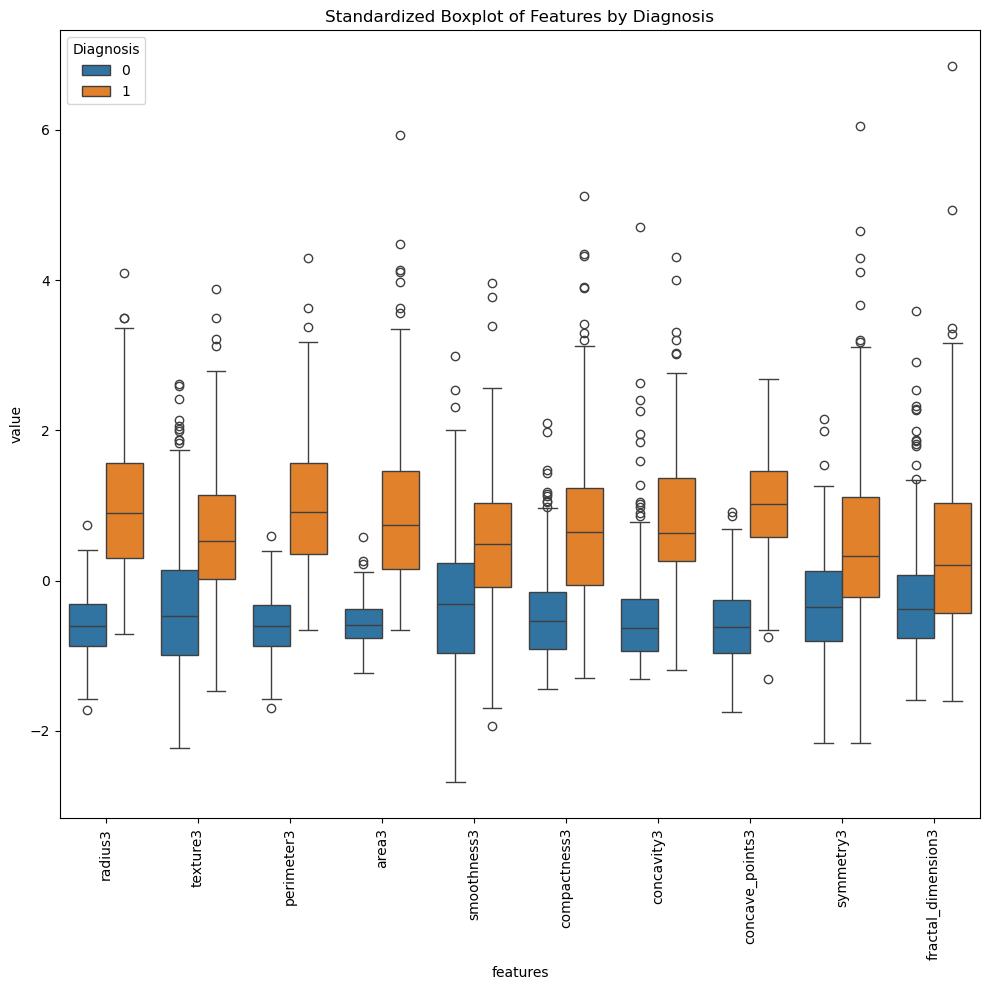

In [ ]:
# list with
worst_features = ['radius3', 'texture3','perimeter3', 'area3',
                  'smoothness3','compactness3', 'concavity3',
                  'concave_points3','symmetry3', 'fractal_dimension3']

# visualizing target variable
w_summary = helper.custom_describe(df, worst_features, plot=True)

# write a summary of the results, we see the trend in all the features that radius, perimeter, area, concavity, concave points stand out

## Correlation Analysis

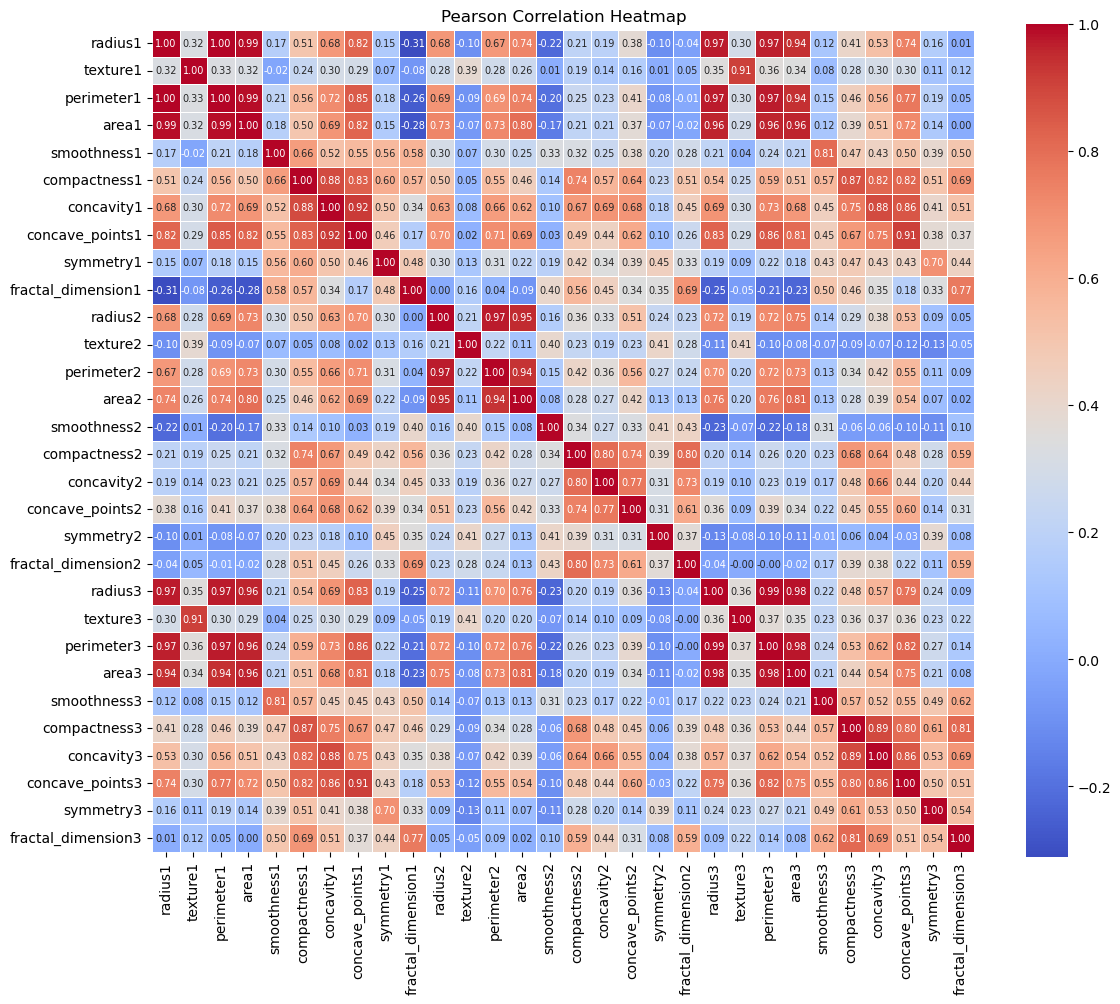

In [ ]:
# Keep only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute Pearson correlation matrix
corr_matrix = df_numeric.corr(method='pearson')

# Extract upper triangle (without self-correlations)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Flatten and filter for strong correlations
high_corr_pairs = (
    upper.stack()
    .reset_index()
    .rename(columns={0: 'Correlation', 'level_0': 'Feature 1', 'level_1': 'Feature 2'})
)

#  Plot the annotated heatmap
plt.figure(figsize=(12, 10))  # standard size
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5, square=True,
            annot=True, fmt='.2f', annot_kws={"size": 7})
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Filter for high correlation values
threshold = 0.8
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs['Correlation']) > threshold]
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', ascending=False)

# Display the table
print("Highly Correlated Feature Pairs (|Pearson r| > 0.8):\n")
print(high_corr_pairs)

Highly Correlated Feature Pairs (|Pearson r| > 0.8):

           Feature 1           Feature 2  Correlation
1            radius1          perimeter1     0.997855
391          radius3          perimeter3     0.993708
2            radius1               area1     0.987357
57        perimeter1               area1     0.986507
392          radius3               area3     0.984015
407       perimeter3               area3     0.977578
246          radius2          perimeter2     0.972794
76        perimeter1          perimeter3     0.970387
19           radius1             radius3     0.969539
74        perimeter1             radius3     0.969476
21           radius1          perimeter3     0.965137
100            area1             radius3     0.962746
103            area1               area3     0.959213
102            area1          perimeter3     0.959120
247          radius2               area2     0.951830
77        perimeter1               area3     0.941550
22           radius1        

this was bound to happen as we have a lot of same kind of varaibles but which look at different aspects of the structure, next we will choose PCA and LDA to get rid of multicollinearity and see if it works

## Feature Selection

### PCA (Unsupervised)

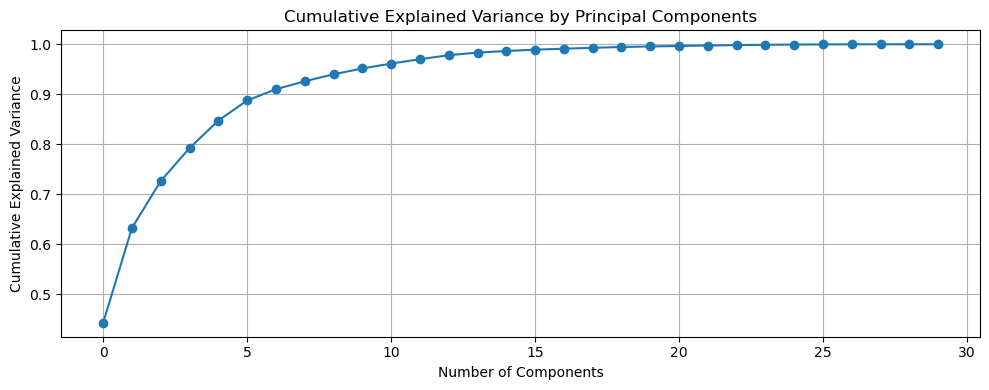

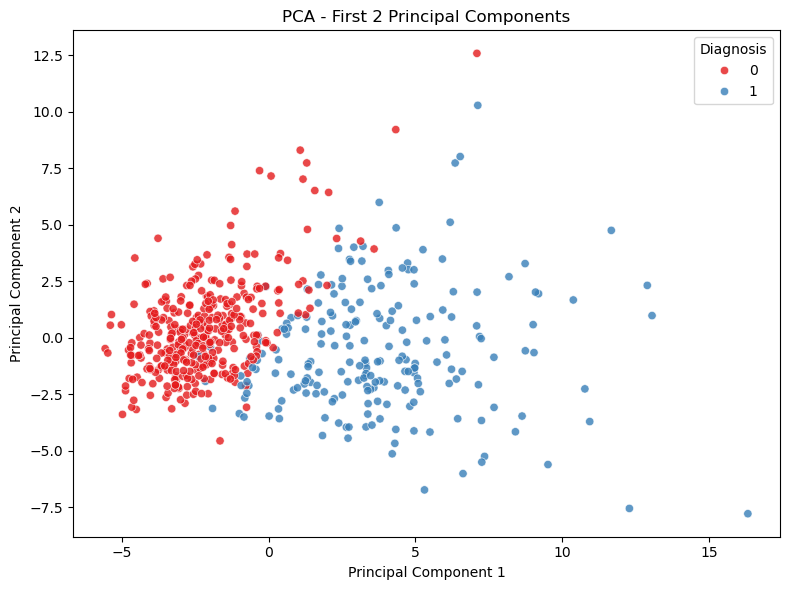

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. saving numeric features in
X = df_numeric

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Create DataFrame with PCA results
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)
df_pca['Diagnosis'] = df['Diagnosis'].values  # add labels back for visualization

# 5. Plot Explained Variance
plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Plot PCA in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Diagnosis', palette='Set1', alpha=0.8)
plt.title('PCA - First 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

from first figure we can make out that 10 PC are enough so we are going to use for our data models

In [ ]:
# saving in a list
features = df_numeric.columns.tolist()

# Get PCA components (loadings)
loadings = pd.DataFrame(
    pca.components_[:10],  # Top 10 PCs
    columns=features,
    index=[f'PC{i+1}' for i in range(10)]
)

# Show loadings table
print("Top 10 Principal Components - Feature Contributions (Loadings):\n")
print(loadings.T)  # Transpose for easier reading

Top 10 Principal Components - Feature Contributions (Loadings):

                         PC1       PC2       PC3       PC4       PC5  \
radius1             0.218902 -0.233857 -0.008531 -0.041409 -0.037786   
texture1            0.103725 -0.059706  0.064550  0.603050  0.049469   
perimeter1          0.227537 -0.215181 -0.009314 -0.041983 -0.037375   
area1               0.220995 -0.231077  0.028700 -0.053434 -0.010331   
smoothness1         0.142590  0.186113 -0.104292 -0.159383  0.365089   
compactness1        0.239285  0.151892 -0.074092 -0.031795 -0.011704   
concavity1          0.258400  0.060165  0.002734 -0.019123 -0.086375   
concave_points1     0.260854 -0.034768 -0.025564 -0.065336  0.043861   
symmetry1           0.138167  0.190349 -0.040240 -0.067125  0.305941   
fractal_dimension1  0.064363  0.366575 -0.022574 -0.048587  0.044424   
radius2             0.205979 -0.105552  0.268481 -0.097941  0.154456   
texture2            0.017428  0.089980  0.374634  0.359856  0.191651   

In [ ]:
for i in range(10):
    print(f"\nTop features for PC{i+1}:")
    print(loadings.T.iloc[:, i].abs().sort_values(ascending=False).head(5))


Top features for PC1:
concave_points1    0.260854
concavity1         0.258400
concave_points3    0.250886
compactness1       0.239285
perimeter3         0.236640
Name: PC1, dtype: float64

Top features for PC2:
fractal_dimension1    0.366575
fractal_dimension2    0.280092
fractal_dimension3    0.275339
radius1               0.233857
compactness2          0.232716
Name: PC2, dtype: float64

Top features for PC3:
texture2       0.374634
smoothness2    0.308839
symmetry2      0.288584
symmetry3      0.271313
radius2        0.268481
Name: PC3, dtype: float64

Top features for PC4:
texture3       0.632808
texture1       0.603050
texture2       0.359856
smoothness1    0.159383
area2          0.108205
Name: PC4, dtype: float64

Top features for PC5:
smoothness1     0.365089
concavity2      0.353982
smoothness3     0.324435
symmetry1       0.305941
compactness2    0.279968
Name: PC5, dtype: float64

Top features for PC6:
symmetry3      0.498927
symmetry2      0.490246
smoothness3    0.369255


In [ ]:
n_components = 10
X_pca_n = X_pca[:, :n_components]  # first 10 components

In [ ]:
pca_features = pd.DataFrame(X_pca_n, columns=[f'PC{i+1}' for i in range(n_components)])

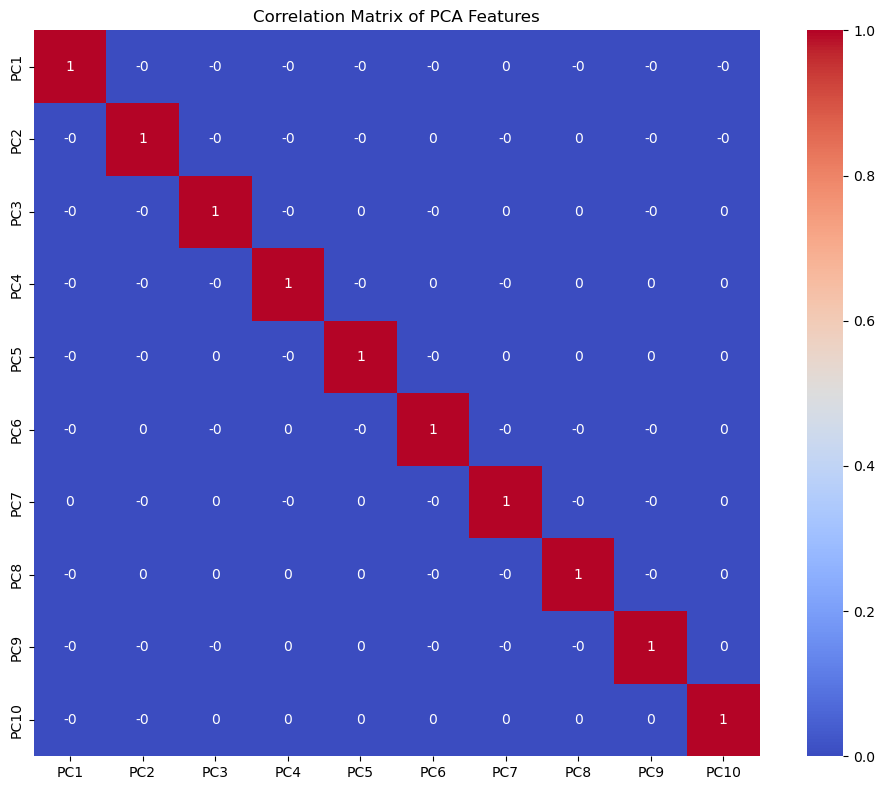

In [ ]:
corr = pca_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr.round(2), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix of PCA Features")
plt.tight_layout()
plt.show()

### LDA (Supervised)

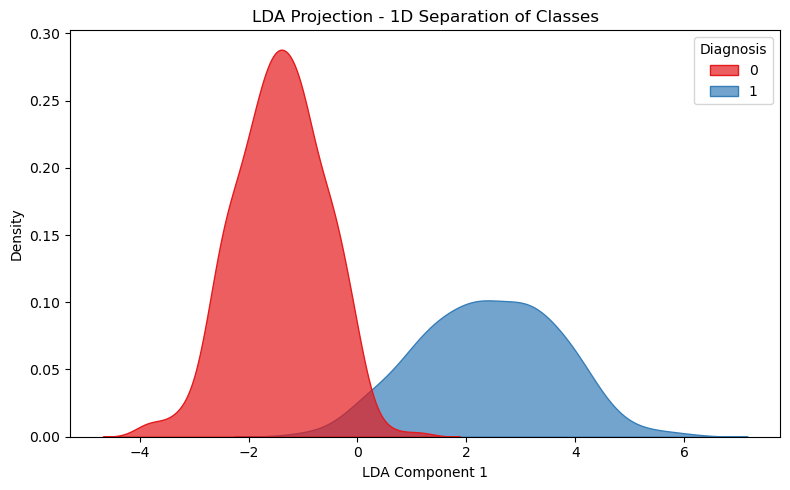

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. Select features and label
X = df.drop(columns='Diagnosis')  # All 30 numeric features
y = df['Diagnosis']

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# 4. Create a DataFrame for plotting
df_lda = pd.DataFrame({'LDA_Component': X_lda.flatten(), 'Diagnosis': y})

# 5. Plot the 1D distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_lda, x='LDA_Component', hue='Diagnosis', fill=True, palette='Set1', alpha=0.7)
plt.title("LDA Projection - 1D Separation of Classes")
plt.xlabel("LDA Component 1")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

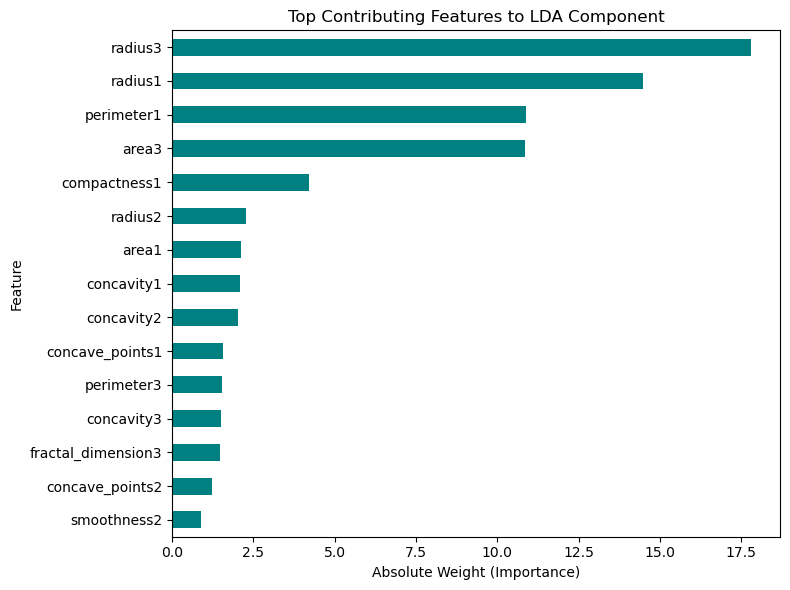

radius1              -14.483357
texture1               0.368958
perimeter1            10.886578
area1                  2.110879
smoothness1            0.022478
compactness1          -4.208098
concavity1             2.103283
concave_points1        1.568463
symmetry1              0.053139
fractal_dimension1     0.004432
dtype: float64


In [ ]:
# 1. Get LDA coefficients (feature weights)
lda_weights = pd.Series(lda.coef_[0], index=X.columns)

# 2. Sort by absolute value to show strongest contributors
lda_weights_sorted = lda_weights.abs().sort_values(ascending=True)
top_features = lda_weights_sorted.tail(15)  # top 15 for readability

# 3. Plot horizontal bar chart
plt.figure(figsize=(8, 6))
top_features.plot(kind='barh', color='teal')
plt.title("Top Contributing Features to LDA Component")
plt.xlabel("Absolute Weight (Importance)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# feature table
print(lda_weights.head(10))

#### LDA's class separation is most strongly driven by features related to tumor size and border shape (radius, area, perimeter, concavity, etc.). This aligns well with our earlier PCA loadings too — but now it's confirmed in a supervised way.

### Random Forest + RFE